<a href="https://colab.research.google.com/github/ultra151/cv/blob/main/11_DeepDream.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


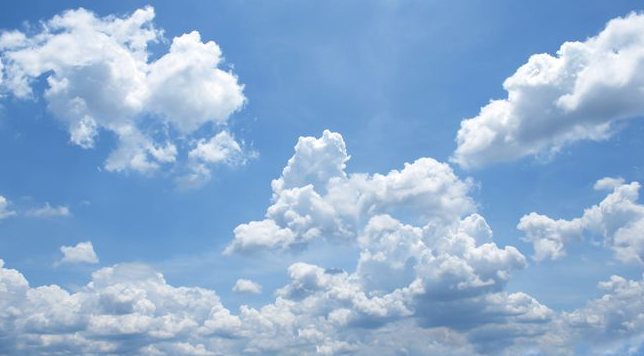

In [ ]:
from keras.models import Model
from IPython.display import display
from IPython.display import Image as _Imgdis
from keras.preprocessing.image import array_to_img, img_to_array, load_img

image_path = '/content/gdrive/MyDrive/pytest_img/opencv/cloud.png'
display(_Imgdis(filename=image_path))

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
model = InceptionV3()
model.summary()

Model: "inception_v3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 299, 299, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 149, 149, 32)   │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 149, 149, 32)   │             96 │ conv2d[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 149, 149, 32)   │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 147, 147, 32)   │          9,216 │ activation[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 147, 147, 32)   │             96 │ conv2d_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, 147, 147, 32)   │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 147, 147, 64)   │         18,432 │ activation_1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 147, 147, 64)   │            192 │ conv2d_2[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_2 (Activation) │ (None, 147, 147, 64)   │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 73, 73, 64)     │              0 │ activation_2[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 73, 73, 80)     │          5,120 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 73, 73, 80)     │            240 │ conv2d_3[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_3 (Activation) │ (None, 73, 73, 80)     │              0 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 71, 71, 192)    │        138,240 │ activation_3[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_4     │ (None, 71, 71, 192)    │            576 │ conv2d_4[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_4 (Activat

 Total params: 23,851,784 (90.99 MB)

 Trainable params: 23,817,352 (90.86 MB)

 Non-trainable params: 34,432 (134.50 KB)

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
model = InceptionV3(weights="imagenet", include_top=False)

In [ ]:
layer_settings = {
    "mixed4":1.0,
    "mixed5":1.5,
    "mixed6":2.0,
    "mixed7":2.5,
}

In [ ]:
outputs_dict = dict(
    [(layer.name, layer.output) for layer in [model.get_layer(name) for name in layer_settings.keys()]]
)
feature_extractor = Model(inputs=model.inputs, outputs=outputs_dict)

In [ ]:
import tensorflow as tf

def compute_loss(input_image):
    features = feature_extractor(input_image)
    loss = tf.zeros(shape=())
    for name in features.keys():
        coeff = layer_settings[name]
        activation = features[name]
        loss += coeff * tf.reduce_mean(tf.square(activation[:, 2: -2, 2: -2, :]))
    return loss

In [ ]:
def gradient_ascent_step(image, learning_rate):
    with tf.GradientTape() as tape:
        tape.watch(image)
        loss = compute_loss(image)
    grads = tape.gradient(loss, image)
    grads = tf.math.l2_normalize(grads)
    image += learning_rate * grads
    return loss, image

In [ ]:
def gradient_ascent_loop(image, iterations, learning_rate, max_loss=None):
    for i in range(iterations):
        loss, image = gradient_ascent_step(image, learning_rate)
        if max_loss is not None and loss > max_loss:
            break
        print(f"...스텝 {1}에서 손실값: {loss:.2f}")
    return image

In [ ]:
import numpy as np

def preprocess_image(image_path):
    img = load_img(image_path)
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = tf.keras.applications.inception_v3.preprocess_input(img)
    return img

In [ ]:
def deprocess_image(img):
    img = img.reshape((img.shape[1], img.shape[2], 3))
    img += 1.0
    img *= 127.5
    img = np.clip(img, 0, 255).astype("uint8")
    return img

In [ ]:
original_img = preprocess_image(image_path)
original_shape = original_img.shape[1:3]

In [ ]:
step = 20
num_octave = 3
octave_scale = 1.4
iterations = 30
max_loss = 15.0

In [ ]:
original_shape

(356, 644)

In [ ]:
successive_shapes = [original_shape]
for i in range(1, num_octave):
    shape = tuple(int(dim / (octave_scale**i)) for dim in original_shape)
    successive_shapes.append(shape)
successive_shapes = successive_shapes[::-1]

In [ ]:
shrunk_original_img = tf.image.resize(original_img, successive_shapes[0])
img = tf.identity(original_img)

In [ ]:
for i, shape in enumerate(successive_shapes):
    print(f"{shape} 크기의 {i}번째 옥타브 처리")
    img = tf.image.resize(img, shape)
    img = gradient_ascent_loop(
        img, iterations=iterations, learning_rate=step, max_loss=max_loss
    )
    upscaled_shrunk_original_img = tf.image.resize(shrunk_original_img, shape)
    same_size_original = tf.image.resize(original_img, shape)
    lost_detail = same_size_original - upscaled_shrunk_original_img
    img += lost_detail
    shrunk_original_img = tf.image.resize(original_img, shape)

(181, 328) 크기의 0번째 옥타브 처리
...스텝 1에서 손실값: 0.83
...스텝 1에서 손실값: 0.98
...스텝 1에서 손실값: 1.58
...스텝 1에서 손실값: 2.22
...스텝 1에서 손실값: 2.76
...스텝 1에서 손실값: 3.38
...스텝 1에서 손실값: 4.09
...스텝 1에서 손실값: 4.88
...스텝 1에서 손실값: 5.65
...스텝 1에서 손실값: 6.66
...스텝 1에서 손실값: 7.39
...스텝 1에서 손실값: 8.19
...스텝 1에서 손실값: 9.18
...스텝 1에서 손실값: 10.08
...스텝 1에서 손실값: 10.97
...스텝 1에서 손실값: 11.98
...스텝 1에서 손실값: 12.76
...스텝 1에서 손실값: 13.63
...스텝 1에서 손실값: 14.59
(254, 460) 크기의 1번째 옥타브 처리
...스텝 1에서 손실값: 1.55
...스텝 1에서 손실값: 2.86
...스텝 1에서 손실값: 4.01
...스텝 1에서 손실값: 4.97
...스텝 1에서 손실값: 5.90
...스텝 1에서 손실값: 6.65
...스텝 1에서 손실값: 7.56
...스텝 1에서 손실값: 8.20
...스텝 1에서 손실값: 9.15
...스텝 1에서 손실값: 9.82
...스텝 1에서 손실값: 10.60
...스텝 1에서 손실값: 11.24
...스텝 1에서 손실값: 12.08
...스텝 1에서 손실값: 12.65
...스텝 1에서 손실값: 13.32
...스텝 1에서 손실값: 14.09
...스텝 1에서 손실값: 14.80
(356, 644) 크기의 2번째 옥타브 처리
...스텝 1에서 손실값: 1.54
...스텝 1에서 손실값: 2.73
...스텝 1에서 손실값: 3.81
...스텝 1에서 손실값: 4.68
...스텝 1에서 손실값: 5.46
...스텝 1에서 손실값: 6.20
...스텝 1에서 손실값: 6.76
...스텝 1에서 손실값: 7.43
...스텝 1에서 손실값: 8.02
...스텝 1에서

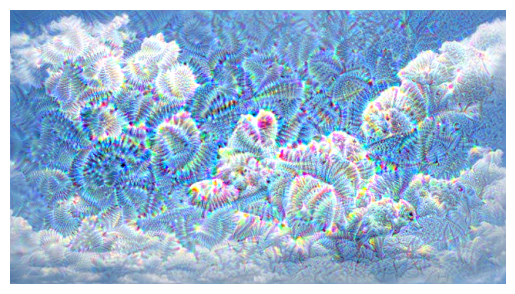

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(deprocess_image(img.numpy()))
plt.axis('off')
plt.show()